DATASET

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

FEATURES The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price. bold text bold text

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/regression 3/regression/flight price prediction/business.csv')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/regression 3/regression/flight price prediction/economy.csv')

In [5]:
df1.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
5,11-02-2022,Vistara,UK,985,19:50,Delhi,02h 10m,non-stop,22:00,Mumbai,"50,264"
6,11-02-2022,Air India,AI,479,21:15,Delhi,17h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,15:00,Mumbai,"50,669"
7,11-02-2022,Air India,AI,473,18:40,Delhi,22h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:25,Mumbai,"51,059"
8,11-02-2022,Vistara,UK,871,20:35,Delhi,17h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,14:30,Mumbai,"51,731"
9,11-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"53,288"


In [6]:
df1.tail(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
93477,31-03-2022,Air India,AI,440,06:10,Chennai,17h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:35,Hyderabad,"51,345"
93478,31-03-2022,Air India,AI,539,17:00,Chennai,18h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:55,Hyderabad,"51,345"
93479,31-03-2022,Air India,AI,430,09:55,Chennai,23h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:00,Hyderabad,"51,345"
93480,31-03-2022,Air India,AI,440,06:10,Chennai,26h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:00,Hyderabad,"51,345"
93481,31-03-2022,Air India,AI,569,06:20,Chennai,17h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:35,Hyderabad,"68,739"
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"
93486,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585"


In [7]:
df2.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
5,11-02-2022,Vistara,UK,945,11:40,Delhi,02h 20m,non-stop,14:00,Mumbai,"5,955"
6,11-02-2022,Vistara,UK,927,09:30,Delhi,02h 05m,non-stop,11:35,Mumbai,"6,060"
7,11-02-2022,Vistara,UK,951,14:20,Delhi,02h 10m,non-stop,16:30,Mumbai,"6,060"
8,11-02-2022,GO FIRST,G8,334,08:00,Delhi,02h 10m,non-stop,10:10,Mumbai,"5,954"
9,11-02-2022,GO FIRST,G8,336,14:20,Delhi,02h 15m,non-stop,16:35,Mumbai,"5,954"


In [8]:
df2.tail(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
206764,31-03-2022,Vistara,UK,822,09:45,Chennai,11h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"6,032"
206765,31-03-2022,Vistara,UK,828,07:00,Chennai,13h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"6,032"
206766,31-03-2022,Air India,AI,569,06:20,Chennai,17h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:35,Hyderabad,"6,541"
206767,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"6,966"
206768,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"6,966"
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206773,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


In [9]:
df = pd.merge(df1,df2, how = 'outer')

In [10]:
df.shape

(300261, 11)

In [11]:
df.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
5,11-02-2022,Vistara,UK,985,19:50,Delhi,02h 10m,non-stop,22:00,Mumbai,"50,264"
6,11-02-2022,Air India,AI,479,21:15,Delhi,17h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,15:00,Mumbai,"50,669"
7,11-02-2022,Air India,AI,473,18:40,Delhi,22h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:25,Mumbai,"51,059"
8,11-02-2022,Vistara,UK,871,20:35,Delhi,17h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,14:30,Mumbai,"51,731"
9,11-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"53,288"


In [12]:
df.tail(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
300251,31-03-2022,Vistara,UK,822,09:45,Chennai,11h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"6,032"
300252,31-03-2022,Vistara,UK,828,07:00,Chennai,13h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"6,032"
300253,31-03-2022,Air India,AI,569,06:20,Chennai,17h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:35,Hyderabad,"6,541"
300254,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"6,966"
300255,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"6,966"
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
300260,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


In [14]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [ ]:
df['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

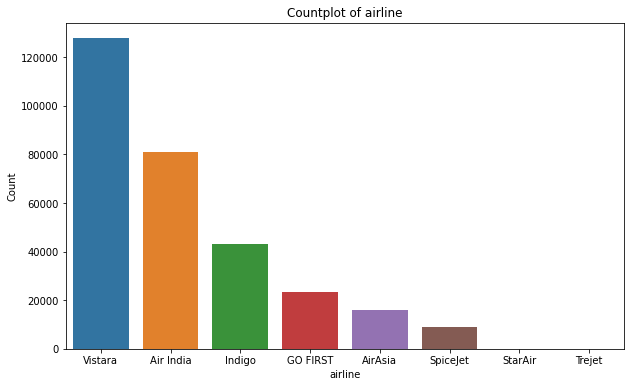

In [ ]:
plt.figure(figsize=(10,6))
# create a list of categories in the desired sequence order
category_order = ['Vistara','Air India','Indigo','GO FIRST','AirAsia','SpiceJet','StarAir','Trejet']

# create a countplot with the desired sequence order
sns.countplot(x='airline', data=df, order=category_order)

# set the title and labels
plt.title('Countplot of airline')
plt.xlabel('airline')
plt.ylabel('Count')

# display the plot
plt.show()

In [ ]:
df['ch_code'].value_counts()

UK    127859
AI     80894
6E     43120
G8     23177
I5     16098
SG      9011
S5        61
2T        41
Name: ch_code, dtype: int64

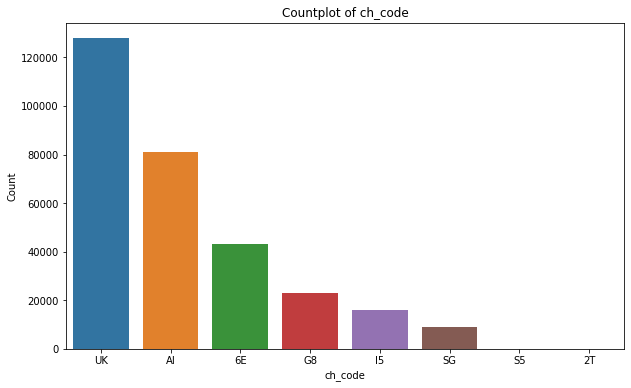

In [ ]:
plt.figure(figsize=(10,6))
# create a list of categories in the desired sequence order
category_order = ['UK','AI','6E','G8','I5','SG','S5','2T']

# create a countplot with the desired sequence order
sns.countplot(x='ch_code', data=df, order=category_order)

# set the title and labels
plt.title('Countplot of ch_code')
plt.xlabel('ch_code')
plt.ylabel('Count')

# display the plot
plt.show()

<Axes: xlabel='dep_time', ylabel='count'>

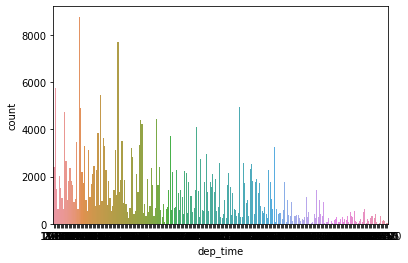

In [ ]:
sns.countplot(x='dep_time', data=df)

<Axes: xlabel='from', ylabel='count'>

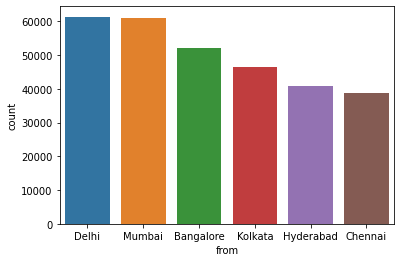

In [ ]:
sns.countplot(x='from', data=df)

In [ ]:
df['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

<Axes: xlabel='time_taken', ylabel='count'>

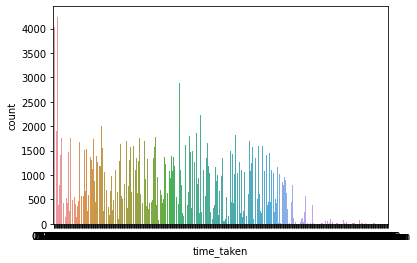

In [ ]:
sns.countplot(x='time_taken', data=df)

<Axes: xlabel='arr_time', ylabel='count'>

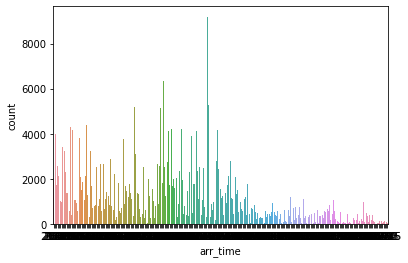

In [ ]:
sns.countplot(x='arr_time', data=df)

In [ ]:
df['to'].value_counts()

Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64

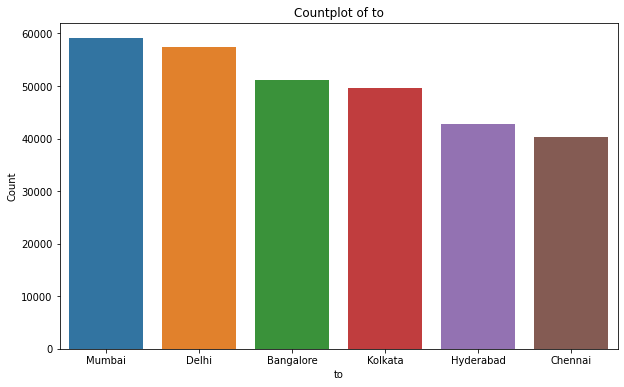

In [ ]:
plt.figure(figsize=(10,6))
# create a list of categories in the desired sequence order
category_order = ['Mumbai','Delhi','Bangalore','Kolkata','Hyderabad','Chennai']

# create a countplot with the desired sequence order
sns.countplot(x='to', data=df, order=category_order)

# set the title and labels
plt.title('Countplot of to')
plt.xlabel('to')
plt.ylabel('Count')

# display the plot
plt.show()

In [ ]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [ ]:
categorical_list = ['date', 'airline', 'ch_code','dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price']

In [ ]:
for i in categorical_list:
  df[i]=df[i].astype('category').cat.codes 

In [ ]:
df.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,10,0,2,868,179,2,14,39,217,5,4763
1,10,0,2,624,191,2,17,39,232,5,4763
2,10,0,2,531,203,2,293,0,226,5,6522
3,10,0,2,839,220,2,314,0,264,5,6584
4,10,0,2,544,170,2,71,0,264,5,6659
5,10,7,7,985,201,2,16,39,241,5,7587
6,10,0,2,479,218,2,209,0,157,5,7604
7,10,0,2,473,187,2,269,0,186,5,7631
8,10,7,7,871,210,2,211,0,151,5,7666
9,10,7,7,977,191,2,17,39,232,5,7721


<Axes: xlabel='date'>

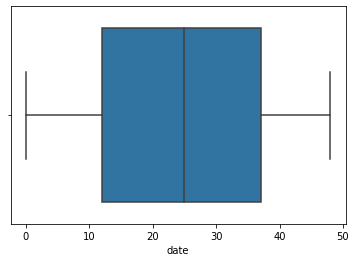

In [ ]:
sns.boxplot(x=df['date'])

<Axes: xlabel='airline'>

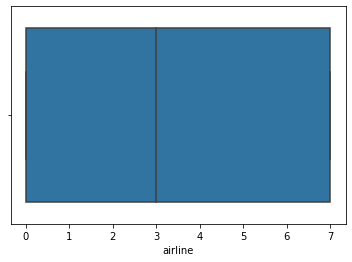

In [ ]:
sns.boxplot(x=df['airline'])

<Axes: xlabel='ch_code'>

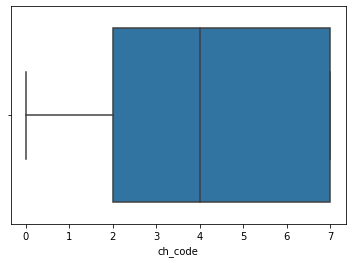

In [ ]:
sns.boxplot(x=df['ch_code'])

<Axes: xlabel='num_code'>

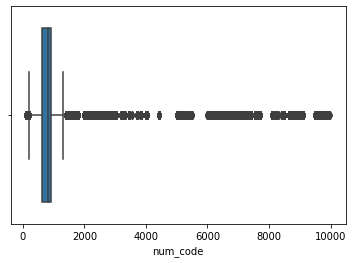

In [ ]:
sns.boxplot(x=df['num_code'])

<Axes: xlabel='dep_time'>

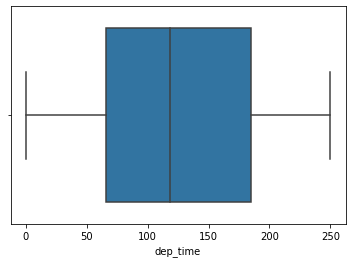

In [ ]:
sns.boxplot(x=df['dep_time'])

<Axes: xlabel='from'>

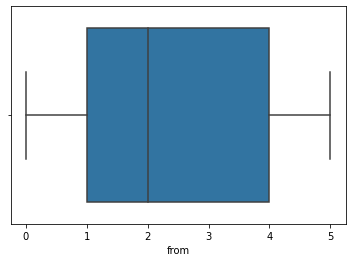

In [ ]:
sns.boxplot(x=df['from'])

<Axes: xlabel='time_taken'>

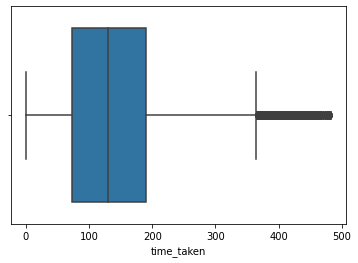

In [ ]:
sns.boxplot(x=df['time_taken'])

<Axes: xlabel='stop'>

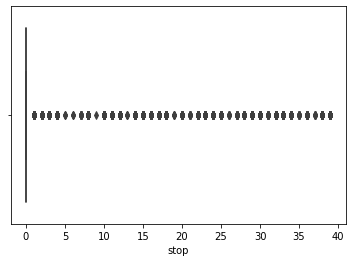

In [ ]:
sns.boxplot(x=df['stop'])

<Axes: xlabel='arr_time'>

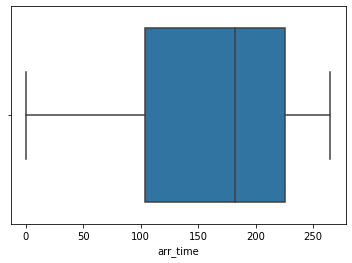

In [ ]:
sns.boxplot(x=df['arr_time'])

<Axes: xlabel='to'>

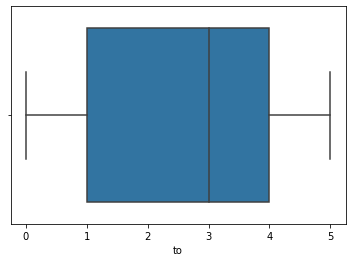

In [ ]:
sns.boxplot(x=df['to'])

In [ ]:
# Removing the outliers
q = df['num_code'].quantile(0.98)
df_cleaned = df[df['num_code']<q]

In [ ]:
# Removing the outliers
q = df['time_taken'].quantile(0.98)
df_cleaned = df[df['time_taken']<q]

In [ ]:
# Removing the outliers
q = df['stop'].quantile(0.98)
df_cleaned = df[df['stop']<q]

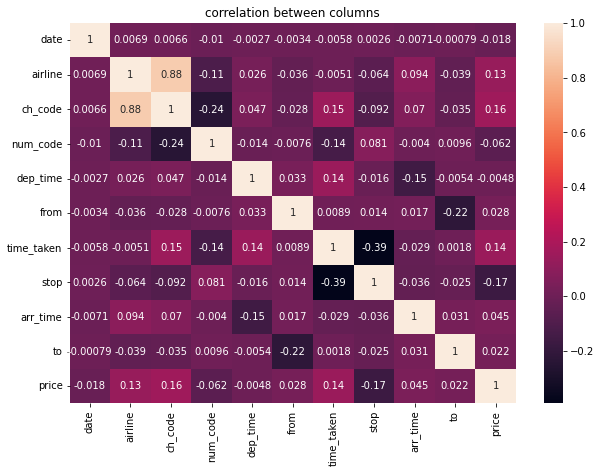

In [ ]:
# Checking the correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation between columns')
plt.show()

In [ ]:

# Split the dataset into training and testing sets
train_data, test_data = np.split(df.sample(frac=1, random_state=42), [int(0.8 * len(df))])

# Define the input features and target variable
X_train = train_data.drop([ "price"], axis=1)
y_train = train_data["price"]
X_test = test_data.drop([ "price"], axis=1)
y_test = test_data["price"]

# Define a function to calculate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define a function to split the data based on a given feature and threshold value
def split_data(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    X_left, y_left = X.loc[left_mask], y.loc[left_mask]
    X_right, y_right = X.loc[right_mask], y.loc[right_mask]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split point for a given feature
def find_best_split(X, y, feature):
    # Sort the data by the feature
    X_sorted = X.sort_values(feature)
    y_sorted = y[X_sorted.index]
    # Initialize the best split point and lowest mse
    best_split = None
    lowest_mse = float("inf")
    # Loop through each unique value of the feature
    for threshold in X_sorted[feature].unique():
        # Split the data at the current threshold
        X_left, y_left, X_right, y_right = split_data(X_sorted, y_sorted, feature, threshold)
        # Calculate the mse for the current split
        mse = mean_squared_error(y_left, y_left.mean()) + mean_squared_error(y_right, y_right.mean())
        # Update the best split and lowest mse if the current mse is lower
        if mse < lowest_mse:
            best_split = (feature, threshold)
            lowest_mse = mse
    return best_split, lowest_mse

In [ ]:
# Define a class for decision tree nodes
class Node:
    def __init__(self, X, y, depth=0, max_depth=5, min_samples_split=2):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_threshold = None
        self.prediction = y.mean()
        # Stop splitting if the node reaches the maximum depth or minimum number of samples
        if depth < max_depth and len(X) >= min_samples_split:
            # Find the best split point among all features
            best_split, lowest_mse = min([find_best_split(X, y, feature) for feature in X.columns], key=lambda x: x[1])
            # Create left and right child nodes and continue splitting recursively
            if best_split is not None:
                self.split_feature, self.split_threshold = best_split
                X_left, y_left, X_right, y_right = split_data(X, y, self.split_feature, self.split_threshold)
                self.left = Node(X_left, y_left, depth+1, max_depth, min_samples_split)
                self.right = Node(X_right, y_right, depth+1, max_depth, min_samples_split)
                self.prediction = None

    def predict_row(self, row):
        # Recursively traverse the tree to find the prediction for a given row
        if self.prediction is not None:
            return self.prediction
        elif row[self.split_feature] <= self.split_threshold:
            return self.left.predict_row(row)
        else:
            return self.right.predict_row(row)

    def predict(self, X):
        # Make predictions for all rows in X
        return np.array([self.predict_row(X.iloc[i]) for i in range(len(X))])

# Train the decision tree on the training data
tree = Node(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)



In [ ]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7019996.139499555


In [ ]:
y_pred

array([6553.25387751, 6553.25387751, 6553.25387751, ..., 6553.25387751,
       6553.25387751, 6553.25387751])

In [ ]:
pred_df = pd.DataFrame({'price':y_pred})

In [ ]:
pred_df.head()

,price
0,6553.253878
1,6553.253878
2,6553.253878
3,6553.253878
4,6553.253878


In [ ]:
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [6553.25387751 6553.25387751 6553.25387751 ... 6553.25387751 6553.25387751
 6553.25387751]
Actual values: [ 7663  8365  4254 ... 10469 10578  5296]
